In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('finalmetrics.csv')
# replace any instance of 'x'' with NaN
df = df.replace('x', np.nan)
# rename "PoS - Ethereum" to "PoS"
df = df.rename(columns={"PoS - Ethereum": "PoS"})
df = df.rename(columns={"PoW - Bitcoin": "PoW"})
df = df.rename(columns={"Proof of Luck": "PoL"})
df = df.rename(columns={"PoA - Autobahn": "PoA"})
df = df.rename(columns={"Num Peers": "num_peers"})
df = df.rename(columns={"Chain Length": "chain_length"})

sims = ["PoS", "PoW", "PoL", "PoA"]
chain_lengths = [10, 30, 50, 100]

# force to numerics
for sim in sims:
    df[sim] = pd.to_numeric(df[sim], errors='coerce')


In [37]:
def plot_stacked(df_to_plot, title, num_chain_lengths = 3):
    # Filter the data for the desired peer groups
    peer_groups = [10, 30, 50, 100]
    filtered_df = df_to_plot[df_to_plot["num_peers"].isin(peer_groups)]

    # Pivot the data to organize it for plotting
    pivot_df = filtered_df.pivot_table(
        index=["num_peers", "chain_length"], values=["PoS", "PoW", "PoL", "PoA"], aggfunc="sum"
    )

    fig, ax = plt.subplots(figsize=(14, 8))

    # Define parameters for spacing
    bar_width = 0.6
    group_spacing = 2  # Increase this value to add more space between peer groups

    # Colors for different chain lengths
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(peer_groups)))

    # Initialize variables for plotting
    x_tick_PoSitions = []
    current_PoS = 0

    # Get all mechanism types (assuming they're the same across peer groups)
    mechanism_types = pivot_df.loc[peer_groups[0]].index.get_level_values(0).unique()

    # Plot each peer group with spacing
    for i, peer_group in enumerate(peer_groups):
        group_data = pivot_df.loc[peer_group]

        # Store the middle PoSition of this peer group for labeling
        group_start = current_PoS

        # Plot bars for each mechanism type
        for j, mech_type in enumerate(mechanism_types):
            bottom = 0
            for k, chain_length in enumerate(group_data.columns):
                value = group_data.loc[mech_type, chain_length]
                ax.bar(
                    current_PoS,
                    value,
                    bottom=bottom,
                    width=bar_width,
                    color=colors[k],
                    label=f"{chain_length}" if i == 0 and j == 0 else "",
                    edgecolor="black",
                    linewidth=0.5,
                )
                bottom += value

            current_PoS += bar_width

        # Calculate the middle PoSition of this group for the x-tick
        middle_PoS = (group_start + current_PoS - bar_width) / 2
        x_tick_PoSitions.append(middle_PoS)

        # Add extra spacing after each peer group
        current_PoS += group_spacing

    # Set custom x-tick PoSitions and labels
    ax.set_xticks(x_tick_PoSitions)
    ax.set_xticklabels([f"{pg} Peers" for pg in peer_groups])
    ax.tick_params(
        axis="x", which="both", pad=10
    )  

    # Remove the original x-axis label
    ax.set_xlabel("")

    # Add labels and title
    plt.title(f"{title} for Different Chain Lengths Across Peer Groups")
    plt.ylabel("Time")

    # Add mechanism type labels below each group
    for i, peer_group in enumerate(peer_groups):
        # Calculate PoSitions for mechanism labels
        mech_PoSitions = []
        start_PoS = (
            x_tick_PoSitions[i] - (len(mechanism_types) * bar_width) / 2 + bar_width / 2
        )
        for j in range(len(mechanism_types)):
            mech_PoSitions.append(start_PoS + j * bar_width)

        # Add mechanism labels under each bar group
        for j, (PoS, mech) in enumerate(zip(mech_PoSitions, mechanism_types)):
            ax.text(PoS, -1, mech, ha="center", va="top", rotation=0, fontsize=9)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles, labels, title="Chain Length", bbox_to_anchor=(1.05, 1), loc="upper left"
    )

    # Adjust bottom margin to make room for mechanism labels
    plt.tight_layout(rect=[0, 0.05, 1, 0.98])

    plt.show()

In [42]:
# # Making the avg cpu be per cpu
# avg_cpu_df = df.iloc[24:36, :]
# # add a column for each of "PoS", "PoL", "PoA" that is "{name}_per_cpu" that is the value divided by the num_peers
# avg_cpu_df["PoS_per_cpu"] = avg_cpu_df["PoS"] / avg_cpu_df["num_peers"]
# avg_cpu_df["PoW_per_cpu"] = avg_cpu_df["PoW"] / avg_cpu_df["num_peers"]
# avg_cpu_df["PoL_per_cpu"] = avg_cpu_df["PoL"] / avg_cpu_df["num_peers"]

# # rename the old "PoS", "PoL", "PoA" to "PoS_total", "PoL_total", "PoA_total"
# avg_cpu_df = avg_cpu_df.rename(columns={"PoS": "PoS_total"})
# avg_cpu_df = avg_cpu_df.rename(columns={"PoW": "PoW_total"})
# avg_cpu_df = avg_cpu_df.rename(columns={"PoL": "PoL_total"})

# #rename is _per_cpu columns to "PoS", "PoL", "PoA"
# avg_cpu_df = avg_cpu_df.rename(columns={"PoS_per_cpu": "PoS"})
# avg_cpu_df = avg_cpu_df.rename(columns={"PoW_per_cpu": "PoW"})
# avg_cpu_df = avg_cpu_df.rename(columns={"PoL_per_cpu": "PoL"})
# avg_cpu_df

In [ ]:
# plot_stacked(avg_cpu_df, "Avg CPU Utilizations")

In [25]:
def plot_custom_groups(groups, title, y_label, df_to_plot, overpeergroups):
    if overpeergroups:
        pivot_df = df_to_plot.pivot_table(
            index=["num_peers", "chain_length"],
            values=sims,
            aggfunc="sum",
        )

    else:
        pivot_df = df_to_plot.pivot_table(
            index=["Metric", "chain_length"],
            values=sims,
            aggfunc="sum",
        )

    _, ax = plt.subplots(figsize=(14, 10))

    # Define parameters for spacing
    bar_width = 0.6
    group_spacing = 2  # Increase this value to add more space between groups

    colors = plt.cm.viridis(np.linspace(0, 1, len(chain_lengths)))

    x_tick_PoSitions = []
    current_PoS = 0

    for i, group in enumerate(groups):
        group_data = pivot_df.loc[group]

        group_start = current_PoS

        # Plot bars for each mechanism type
        for j, mech_type in enumerate(sims):
            bottom = 0
            for k, chain_length in enumerate(group_data.index):
                value = group_data[mech_type].loc[chain_length]
                ax.bar(
                    current_PoS,
                    value,
                    bottom=bottom,
                    width=bar_width,
                    color=colors[k],
                    label=f"{chain_length}" if i == 0 and j == 0 else "",
                    edgecolor="black",
                    linewidth=0.5,
                )
                bottom += value

            current_PoS += bar_width

        middle_PoS = (group_start + current_PoS - bar_width) / 2
        x_tick_PoSitions.append(middle_PoS)

        current_PoS += group_spacing

    # Set custom x-tick PoSitions and labels
    ax.set_xticks(x_tick_PoSitions)
    ax.set_xticklabels(groups)
    ax.tick_params(
        axis="x", which="both", pad=25
    )  

    # Remove the original x-axis label
    ax.set_xlabel("")

    # Add labels and title
    plt.title(f"{title} for Different Chain Lengths Across Peer Groups")
    plt.ylabel(y_label) 

    # Add mechanism type labels below each group
    for i, group in enumerate(groups):
        # Calculate PoSitions for mechanism labels
        mech_PoSitions = []
        start_PoS = x_tick_PoSitions[i] - (len(sims) * bar_width) / 2 + bar_width / 2
        for j in range(len(sims)):
            mech_PoSitions.append(start_PoS + j * bar_width)

        # Add mechanism labels under each bar group
        for j, (PoS, mech) in enumerate(zip(mech_PoSitions, sims)):
            ax.text(PoS, -0.0005, mech, ha="center", va="top", rotation=0, fontsize=9)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(
        handles, labels, title="Chain Length", bbox_to_anchor=(1.05, 1), loc="upper left"
    )

    plt.show()

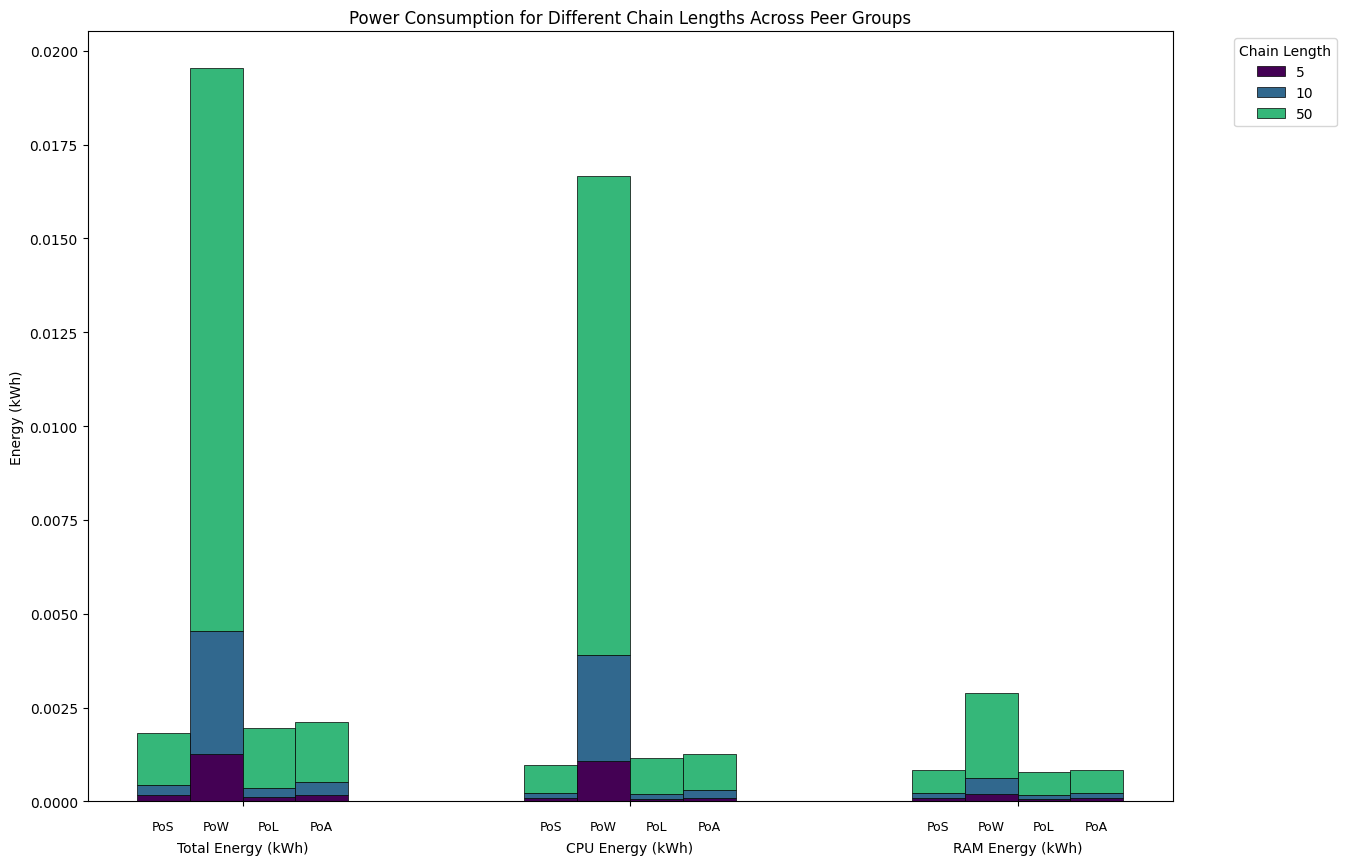

In [39]:
# Graph the energy metrics
energy_df = df.iloc[51:65, :]
energy_df

groups = [
    "Total Energy (kWh)",
    "CPU Energy (kWh)",
    "RAM Energy (kWh)",
    # "Avg CPU Power (W)",
]
title = "Power Consumption"

plot_custom_groups(groups, title, "Energy (kWh)", energy_df, overpeergroups=False)

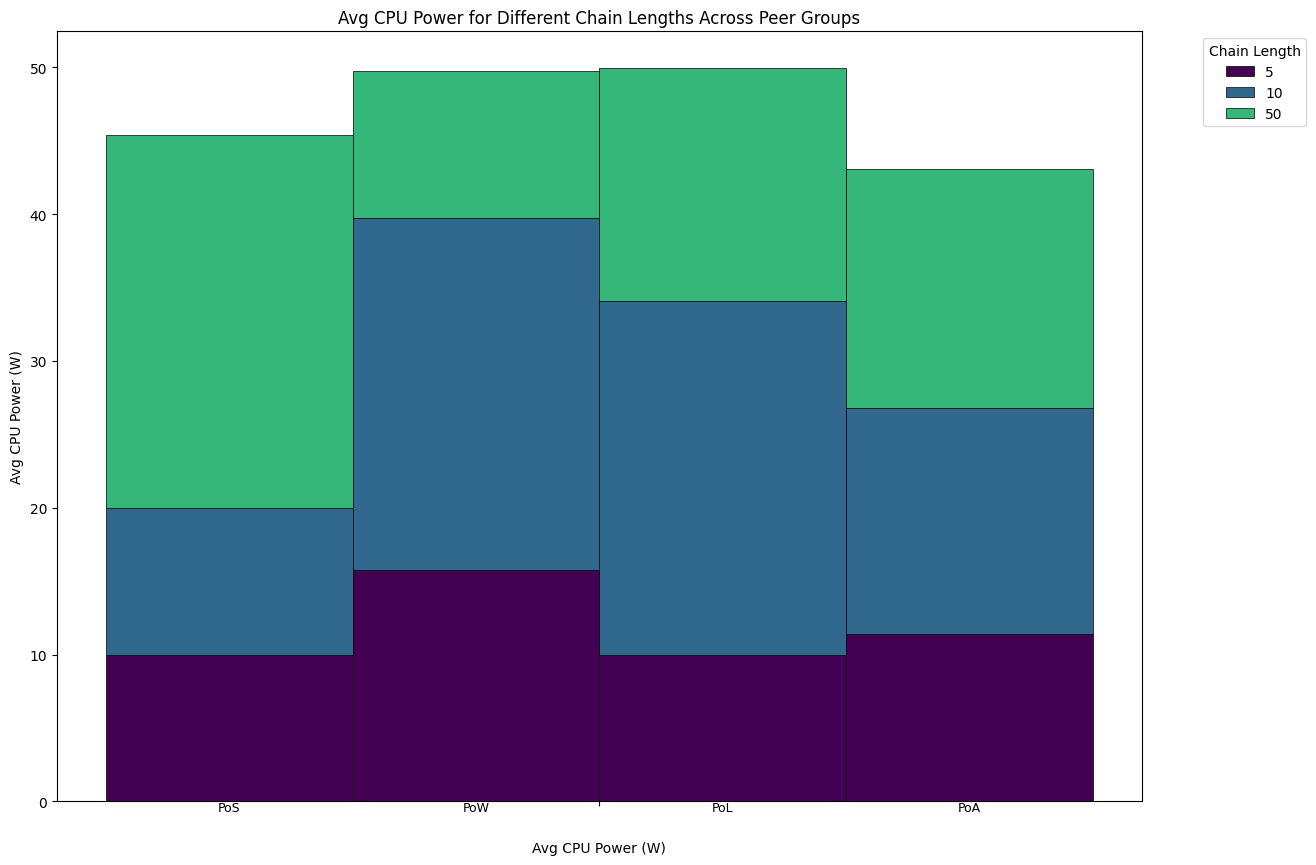

In [40]:
groups = [
    "Avg CPU Power (W)",
]
title = "Avg CPU Power"

plot_custom_groups(
    groups, title, "Avg CPU Power (W)", energy_df, overpeergroups=False
)

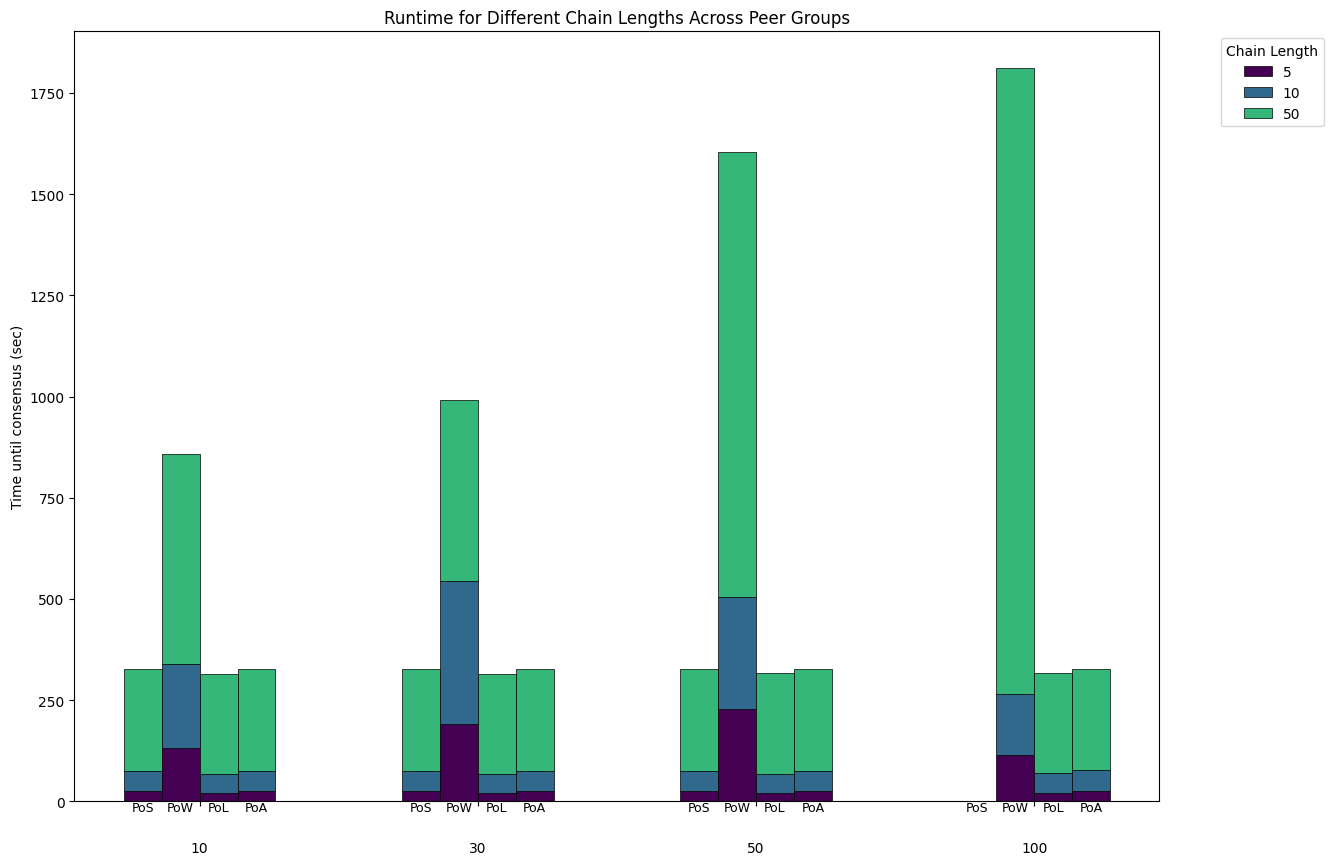

In [27]:
time_df = df.iloc[:12, :]
time_df

plot_custom_groups(
    [10, 30, 50, 100], "Runtime", "Time until consensus (sec)", time_df, overpeergroups=True
)

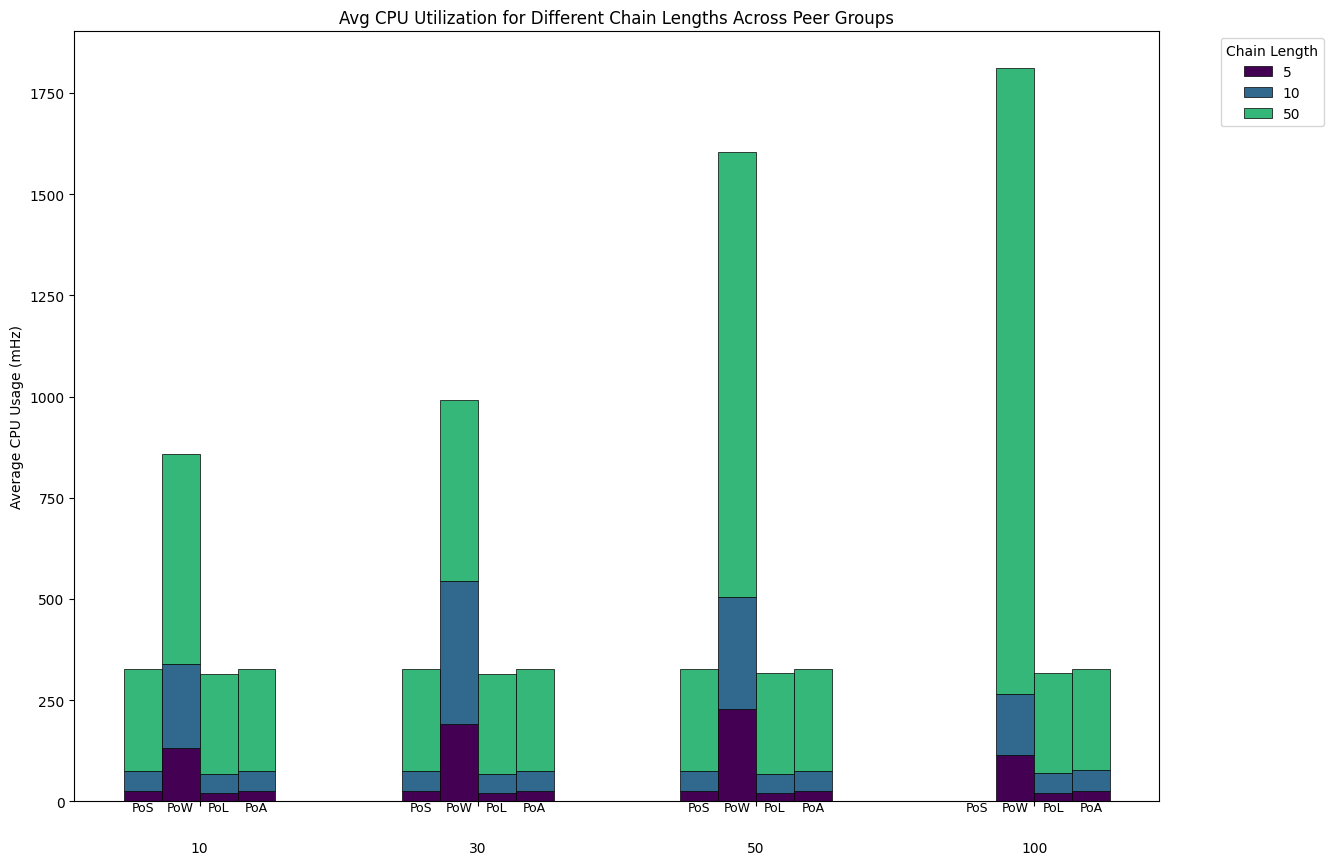

In [28]:
avg_cpu_df = df.iloc[24:36, :]

plot_custom_groups([10, 30, 50, 100], "Avg CPU Utilization", "Average CPU Usage (mHz)", time_df, overpeergroups=True)

In [37]:
# get all the rows in df where the metric is "Total Disk Read (KB)" or "Total Disk Write (KB)"
disk_df = df[
    (df["Metric"] == "Total Disk Read (KB)")
    | (df["Metric"] == "Total Disk Write (KB)")
]
disk_df 

,Metric,num_peers,chain_length,PoS,PoL,PoW,PoA,Unnamed: 7,Bitcoin times
36,Total Disk Read (KB),30,5,4277.7,84.0,0.0,0.0,NaN,NaN
37,Total Disk Read (KB),30,10,0.0,0.0,0.0,0.0,NaN,NaN
38,Total Disk Read (KB),30,50,539.7,12.0,4089.2,0.0,NaN,NaN
42,Total Disk Write (KB),30,5,2674.4,237.0,1376.7,255.0,NaN,NaN
43,Total Disk Write (KB),30,10,495.0,444.0,1575.0,589.0,NaN,NaN
44,Total Disk Write (KB),30,50,4239.9,2184.7,9709.4,1219.0,NaN,NaN


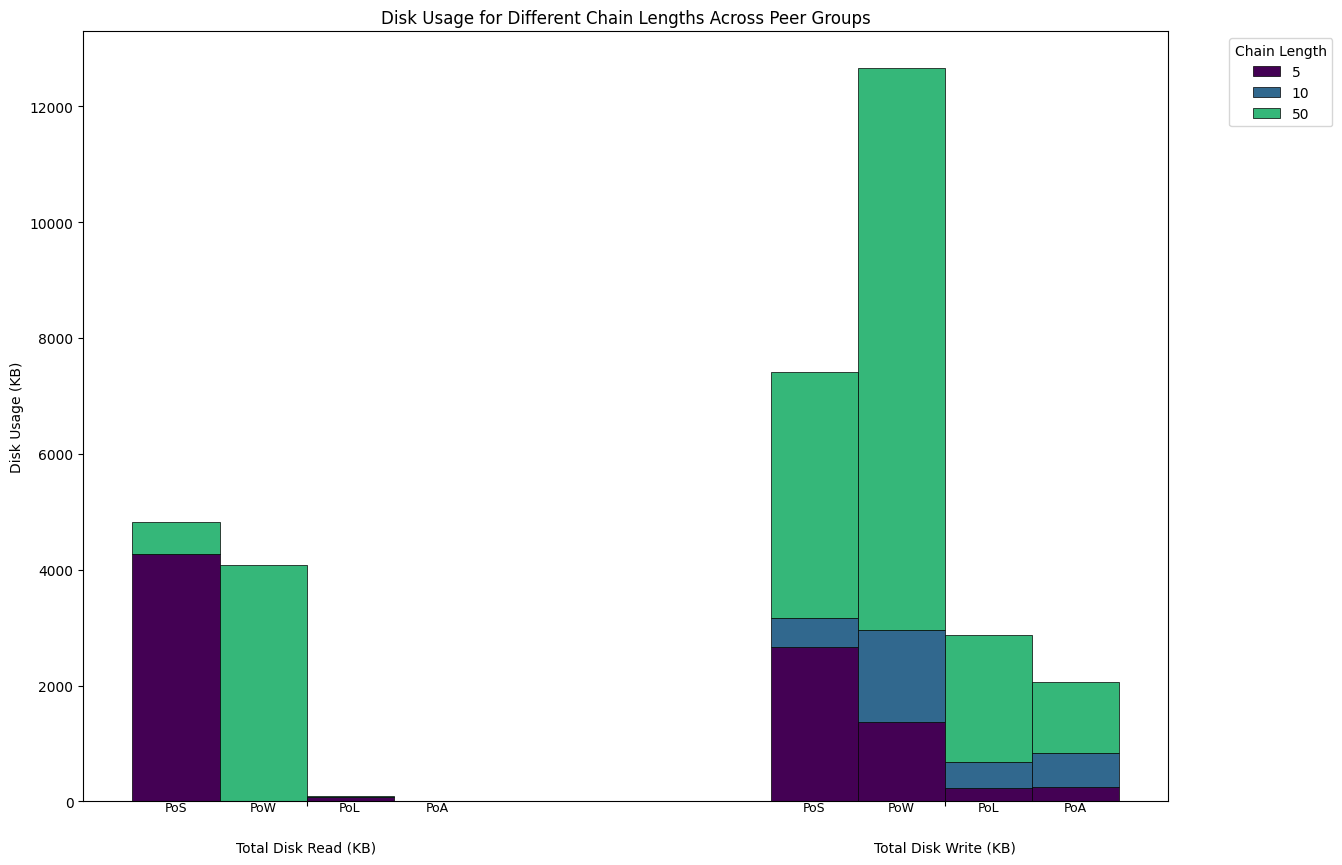

In [38]:
plot_custom_groups(["Total Disk Read (KB)", "Total Disk Write (KB)"], "Disk Usage", "Disk Usage (KB)", disk_df, overpeergroups=False)